# Squared numbers

In [1]:
N = 1000000
%timeit [i**2 for i in range(1000000)]

import numpy as np
x = np.arange(N)
%timeit x**2

193 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
855 µs ± 97.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 1.2 Calculation of pi

In [2]:
k = np.arange(30)

np.sum((-1)**k/(3**k * (2*k+1)))*np.sqrt(12)

3.1415926535897936

## 1.3 Allan variance

In [3]:
N = 1000000
y = np.random.normal(size=N)

def simple_allan_variance(y):
    delta_y = y[1:] - y[:-1]
    return np.mean(delta_y**2)/2

In [4]:
def average_frequency(data, n):
    if len(data)%n!=0:
        data = data[len(data)%n:]
    N = len(data)
    data = data.reshape(N//n, n)
    return data.mean(axis=1)
    
average_frequency(np.arange(10), 2)

array([0.5, 2.5, 4.5, 6.5, 8.5])

In [5]:
def AllanVariance(data, n):
    data_mean = average_frequency(data, n)
    return simple_allan_variance(data_mean)

In [6]:
AllanVariance(y, 10)

0.10008982037232081

## 1.4 Mandelbrot

In [7]:
def mandel_simple(c, N=256):
    z = 0
    for i in range(N):
        z = z**2 + c
        if np.abs(z)>2:
            return i
    return 0

mandel_simple(.5+.5J)

import numba
mandel = numba.vectorize(mandel_simple)

In [8]:
x = np.linspace(-2.13, 0.77, 201)
y = np.linspace(-1.13, 1.13, 201)

X, Y = np.meshgrid(x, y)

c = X + 1J*Y

res = mandel(c, 100)

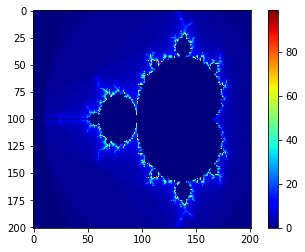

In [9]:
import matplotlib.pyplot as plt

plt.imshow(res, cmap='jet')
plt.colorbar()

# Measurement of pi

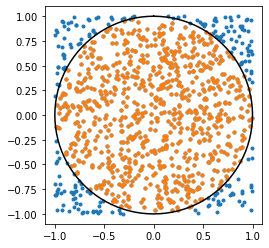

In [10]:
import matplotlib.pyplot as plt
import numpy as np

N = 1000
X = 2*np.random.rand(N)-1
Y = 2*np.random.rand(N)-1

fig = plt.figure()
ax = fig.subplots(1, 1)
ax.plot(X,Y, '.')
cond = (X**2 + Y**2)<1
ax.plot(X[cond],Y[cond], '.')
theta = np.linspace(0, 2*np.pi, 201)
ax.plot(np.sin(theta), np.cos(theta), 'k')
ax.set_aspect(1)

In [11]:
def mesure_pi(N):
    X = 2*np.random.rand(N)-1
    Y = 2*np.random.rand(N)-1
    nb_points = np.sum((X**2 + Y**2)<1)
    return 4*nb_points/N

print(mesure_pi(1000000))

3.14194


# Bode plot

In [12]:
import numpy as np
from matplotlib.pyplot import figure

In [13]:
def H(omega, omega_0, zeta):
    return omega_0**2/(omega_0**2-omega**2 + 2J*omega*zeta*omega_0)

omega_0 = 2*np.pi*1000
zeta = 0.1

Tomega = 2*np.pi*np.logspace(2,4, 1001)
amplitude = H(Tomega, omega_0, zeta)

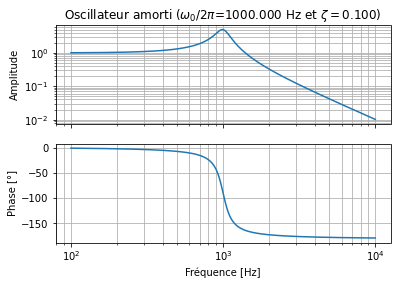

In [14]:
fig = figure()
ax1, ax2 = fig.subplots(2, 1, sharex=True)

title_str = 'Oscillateur amorti ($\omega_0/2\pi$={0:.3f} Hz et $\zeta={1:.3f}$)'
ax1.set_title(title_str.format(omega_0/(2*np.pi),zeta))
ax1.grid(True, which='both')
ax1.loglog(Tomega/(2*np.pi), abs(amplitude))
ax1.set_ylabel('Amplitude')

ax2.semilogx(Tomega/(2*np.pi), np.angle(amplitude)/(2*np.pi)*360)
ax2.set_ylabel(u'Phase [°]')
ax2.set_xlabel(u'Fréquence [Hz]')
ax2.grid(True, which='both')

#savefig('exo1_1.pdf')
#savefig('exo1_1.png')

Text(0.5, 1.0, 'Oscillateur amorti ($\\omega_0/2\\pi$=1000.00 Hz)')

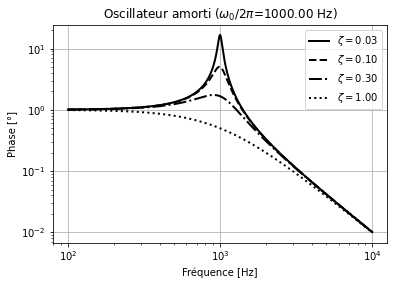

In [15]:
Tzeta = [.03,0.1,0.3,1]
Tlinetype = ['-', '--', '-.', ':']

fig = figure()
ax = fig.subplots(1, 1)

for zeta, linetype in zip(Tzeta, Tlinetype):
    amplitude = H(Tomega, omega_0, zeta)
    ax.loglog(Tomega/(2*np.pi), abs(amplitude), 'k'+linetype, 
        label="$\zeta={0:4.2f}$".format(zeta), linewidth=2)
ax.grid(True)
ax.set_xlabel(u'Fréquence [Hz]')
ax.set_ylabel(u'Phase [°]')
ax.legend()
title_str = 'Oscillateur amorti ($\omega_0/2\pi$={0:.2f} Hz)'
ax.set_title(title_str.format(omega_0/(2*np.pi)))

#savefig('exo1_2.pdf')
#savefig('exo1_2.png')

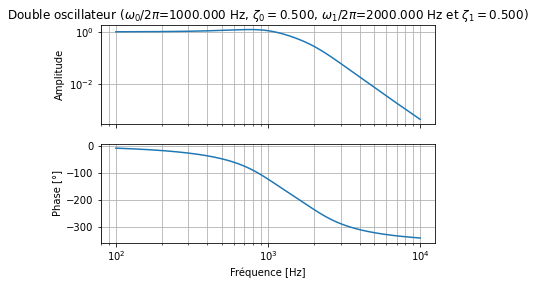

In [16]:
omega_0 = 2*np.pi*1000
omega_1 = 2*np.pi*2000

zeta_0 = 0.5
zeta_1 = 0.5

Tomega = 2*np.pi*np.logspace(2,4, 1001)
amplitude = H(Tomega, omega_0, zeta_0)*H(Tomega, omega_1, zeta_1)

fig = figure()
ax1, ax2 = fig.subplots(2, 1, sharex=True)

title_str='Double oscillateur ($\omega_0/2\pi$={0:.3f} Hz,\
 $\zeta_0={1:.3f}$, $\omega_1/2\pi$={2:.3f} Hz et $\zeta_1={3:.3f}$)'
ax1.set_title(title_str.format(omega_0/(2*np.pi),zeta_0, omega_1/(2*np.pi), zeta_1))
ax1.grid(True, which='both')
ax1.loglog(Tomega/(2*np.pi), abs(amplitude))
ax1.set_ylabel('Amplitude')


phase = np.angle(amplitude)
phase = np.unwrap(phase)

ax2.semilogx(Tomega/(2*np.pi), phase/(2*np.pi)*360)
ax2.set_ylabel(u'Phase [°]')
ax2.set_xlabel(u'Fréquence [Hz]')
ax2.grid(True, which='both')
#savefig('exo1_3.pdf')
#savefig('exo1_3.png')

# Fit of interference fringes

Text(0.5, 0, 'Freq [Hz]')

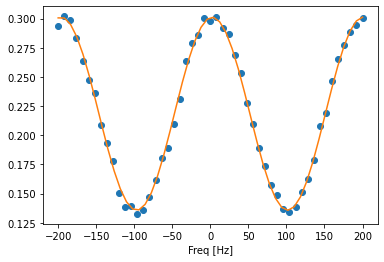

In [17]:
import numpy as np
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit

data = np.loadtxt('data/fit_sinus.dat')

Freq = data[:,0]
Y = data[:,1]

def fringe(x,offset, amplitude, center, Delta_f):
    "y = offset + amplitude* (1+cos(2*pi*(x-center)/Delta_f))/2"
    return offset + amplitude* (1+np.cos(2*np.pi*(x-center)/Delta_f))/2

param_ini = [0.12, .2, 0., 200.]


fig = figure()
ax = fig.subplots(1, 1)
ax.plot(Freq, Y, 'o')

x_fit = np.linspace(min(Freq), max(Freq))
#plot(x_fit, fringe(x_fit, *param_ini))

popt, cov = curve_fit(fringe, Freq, Y, p0=param_ini)

offset, amplitude, center, Delta_f = popt
sigma_offset, sigma_amplitude, sigma_center, sigma_Delta_f = np.sqrt(np.diag(cov))

ax.plot(x_fit, fringe(x_fit, *popt))

ax.set_xlabel('Freq [Hz]')


# Fit of a picture

Distance :  12.465268157884095


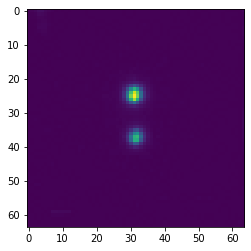

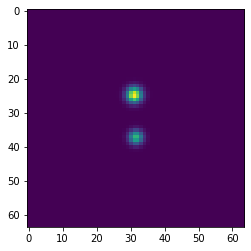

In [18]:
import numpy as np
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit

image = np.loadtxt('data/double_star.txt')

ny, nx = image.shape
X,Y = np.meshgrid(range(nx), range(ny))
# two column matrices with X and Y
XY = np.array([X.flatten(), Y.flatten()]).transpose()

def gauss(XY, amplitude, center_x, center_y, diameter):
    x = XY[:,0]
    y = XY[:,1]
    return amplitude*np.exp(-((x-center_x)**2 + (y-center_y)**2)/diameter**2)

def model(XY, *param):
    return gauss(XY, *param[:4]) + gauss(XY, *param[4:8]) + param[8]

fig = figure()
ax = fig.subplots(1, 1)
ax.imshow(image, interpolation = 'nearest')

# Measured position of the center using the imshow figure.
x0, y0 = 31, 25
x1, y1 = 31, 38

p0 = [200, x0, y0, 2, 200, x1, y1, 2, 0.2]

# One can look at the initial parameters
#image_test = model(XY, *p0).reshape(X.shape)
#ax.imshow(image_test, interpolation = 'nearest')

popt, pcov = curve_fit(model, XY, image.flatten(), p0)
print("Distance : ", np.hypot(popt[1] - popt[5], popt[2] - popt[6]))

fig = figure()
ax = fig.subplots(1, 1)
image_fit = model(XY, *popt).reshape(X.shape)
ax.imshow(image_fit, interpolation = 'nearest')

# Pendulum

In [19]:
import numpy as np
from matplotlib.pyplot import figure
from scipy.integrate import solve_ivp

def f(t, Y):
    y, yprime=Y
    return (yprime, -np.sin(y))

def pendule(theta_0, vit_ang, T, N=1000):
    y0 = [theta_0, vit_ang]
    res = solve_ivp(f, t_span=[0, T], y0=y0, t_eval=np.linspace(0, T, N+1))
    return res.y.T # This is a 2D array

(-3.141592653589793, 3.141592653589793)

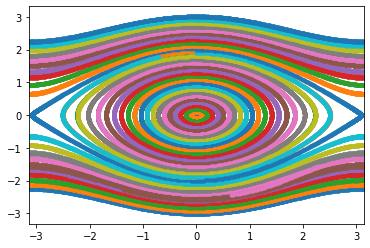

In [20]:
fig = figure()
ax = fig.subplots(1, 1)

Tvit_ini = np.linspace(-3,3, 61)
for vit_ini in Tvit_ini:
    a = pendule(0, vit_ini, 10)
    a[:,0] = ((a[:,0]+np.pi)%(2*np.pi) - np.pi) # Tricks to be between -pi and pi
    ax.plot(a[:,0], a[:,1], '.')

ax.set_xlim(-np.pi,np.pi)

# Schrödinger

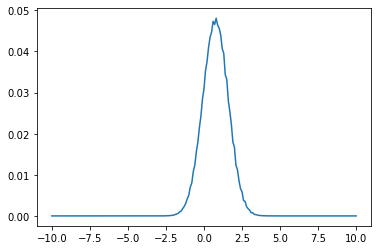

In [21]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

Deltax = 0.1
X_MIN = -10
X_MAX = 10

alpha = .4
x0 = 1

kappa = .5
T = 10
N = 1000

x = np.linspace(X_MIN, X_MAX, int((X_MAX-X_MIN)/Deltax) + 1)

psi_0 = np.exp(-alpha*(x-x0)**2)
psi_0 = psi_0 / np.sqrt(sum(np.abs(psi_0**2)))

V = -.5*kappa*x**2

psi_dot = np.zeros(len(x), dtype="complex128")

def f(t, psi):
    energy = .5*(psi[2:] - 2*psi[1:-1] + psi[:-2])/Deltax**2
    pot = V[1:-1]*psi[1:-1]
    psi_dot[1:-1] = -1j*(energy + pot)
    return psi_dot

r = ode(f).set_integrator('zvode', atol=1E-3)
r.set_initial_value(psi_0,0)

psi_f = r.integrate(1)

plt.figure()
plt.plot(x, np.abs(psi_f)**2)

Text(0.5, 0, 'Time')

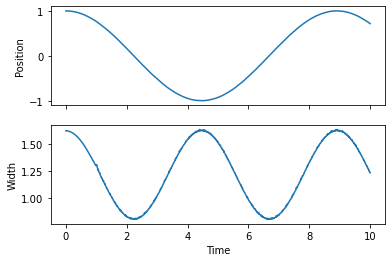

In [22]:
# Calculate the mean position and relative width.
fig = plt.figure()
r = ode(f).set_integrator('zvode', atol=1E-3)
r.set_initial_value(psi_0,0)

dT = np.linspace(0,T,N+1)
out = []
for i, t in enumerate(dT):
    if t>r.t:
        r.integrate(t)
    #print(i)
    out.append([t, sum(x*abs(r.y)**2)/sum(abs(r.y)**2), (np.mean(x**2*abs(r.y)**2) - np.mean(x*abs(r.y)**2)**2)/np.mean(abs(r.y)**2)])

out = np.array(out)    

    
ax1, ax2 = fig.subplots(2, 1, sharex=True)
ax1.plot(out[:,0], out[:,1])
ax2.plot(out[:,0], out[:,2])
ax1.set_ylabel('Position')
ax2.set_ylabel('Width')
ax2.set_xlabel('Time')

# Simple example of Fourier transform

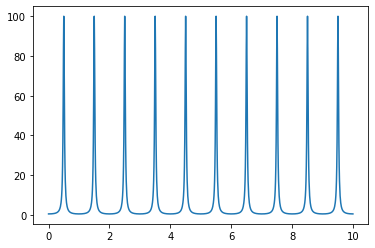

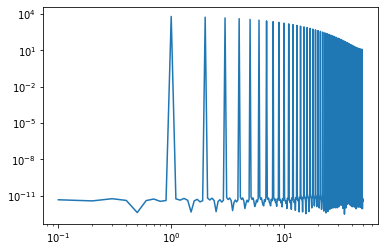

In [23]:
import numpy as np
from numpy.fft import fft

def function(t):
    return 1/ (1+.99 * np.cos(2*np.pi*t))

Taux = 100 # Sample rate
T = 10 # duration
N = int(Taux * T) # number of points
T = N/Taux

X = np.linspace(0, T, N, endpoint=False)
Y = function(X)

fig = figure()
ax = fig.subplots(1, 1)
ax.plot(X,Y)

Ytilde = fft(Y)

Freq = np.arange(N)
# The frequency is defined modulo N. 
# We take values between -N/2 and N/2
Freq[Freq>=N/2] = Freq[Freq>=N/2] - N
Freq = Freq/T

fig = figure()
ax = fig.subplots(1, 1)
ax.loglog(Freq[1:N//2-1], abs(Ytilde)[1:N//2-1])

# Washing machine

In [24]:
from scipy.io.wavfile import read
samplerate, amplitude = read('son/machine_a_laver.wav')

In [25]:
from scipy.signal import periodogram

freq, psd = periodogram(amplitude, fs=samplerate)

Text(0, 0.5, 'PSD [/Hz]')

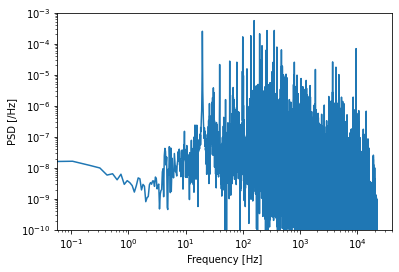

In [26]:
fig = figure()
ax = fig.subplots(1, 1)

ax.loglog(freq, psd)
ax.set_ylim(1E-10, 1E-3)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [/Hz]')

Text(0, 0.5, 'PSD [/Hz]')

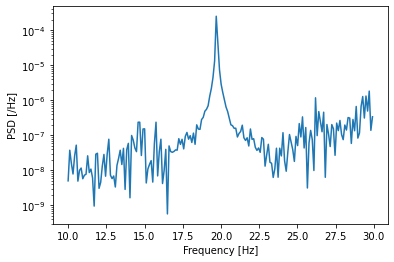

In [27]:
fig = figure()
ax = fig.subplots(1, 1)

mask = (freq>10) & (freq<30)

ax.semilogy(freq[mask], psd[mask])

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [/Hz]')